Myil Vaughanan V L<br>
19BTRCR007

## <center>LAB PROGRAM 9

<b>1. A famous inbuilt data set that is part of R is the ”iris” data set (Fisher, 1936). It gives measurements, in centimeters for sepal length and width and petal length and width, respectively, for 50 flowers of the species Iris setosa, Iris versicolor and Iris virginica. Have a look at the data:<br>
a)	What is the class of the data set? Why? <br>
b)	What are the dimensions of the data set? (number of rows, columns)<br>
c)	Produce a scatter plot of petal length against petal width; produce an informative title and labels of the two axes. <br>
d)	Repeat the same graph, using different symbol colors for the three species. <br>
e)	Add a legend to the graph. Copy-paste the result to a WORD document. If you do not have WORD, make a PDF file of the graph. <br>
f)	Create a box-and whisker plot for sepal length where the data values are split into species groups; use as template the first example in the ”boxplot” help file. <br>
g)	Now produce a similar box-and whisker plot for all four morphological measurements, arranged in two rows and two columns. First specify the graphical parameter that arranges the plots two by two.


In [1]:
df <- datasets::iris
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
# class of the dataset
class(df) # Because the dataset is stored in the form of rows and tables which is a dataframe

[1] "data.frame"

In [5]:
# dimensions of the dataset
dim(df)  # we have 150 rows and 5 columns

[1] 150   5

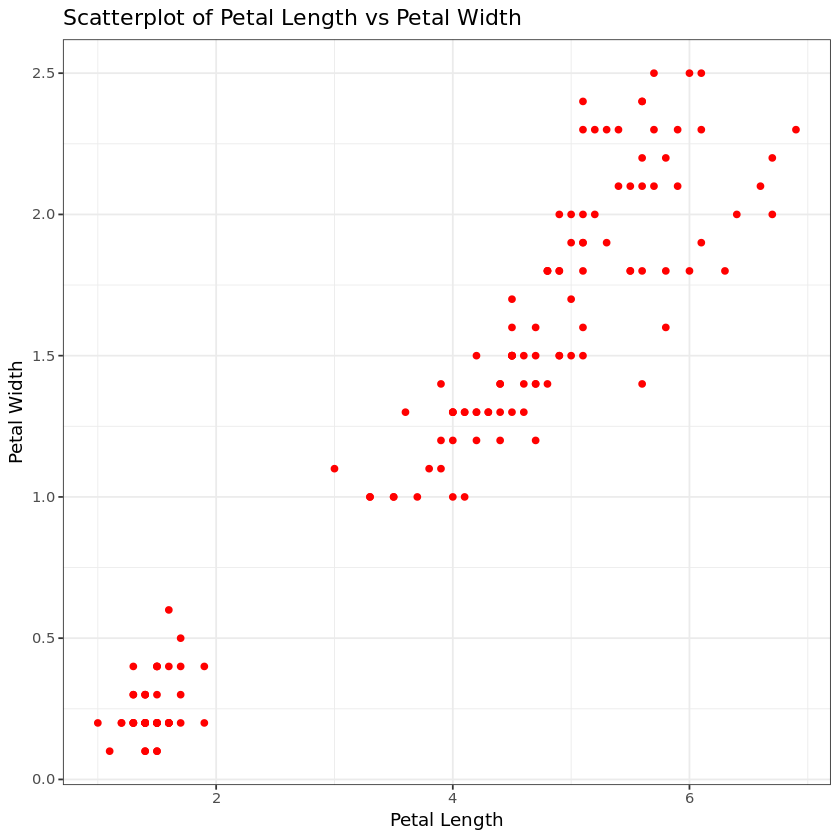

In [17]:
# scatter plot of petal length against petal width
library(tidyverse)
ggplot(df) + geom_point(aes(x=Petal.Length, y=Petal.Width), color='red') +theme_bw()+ xlab("Petal Length") +ylab("Petal Width")
+ ggtitle("Scatterplot of Petal Length vs Petal Width")

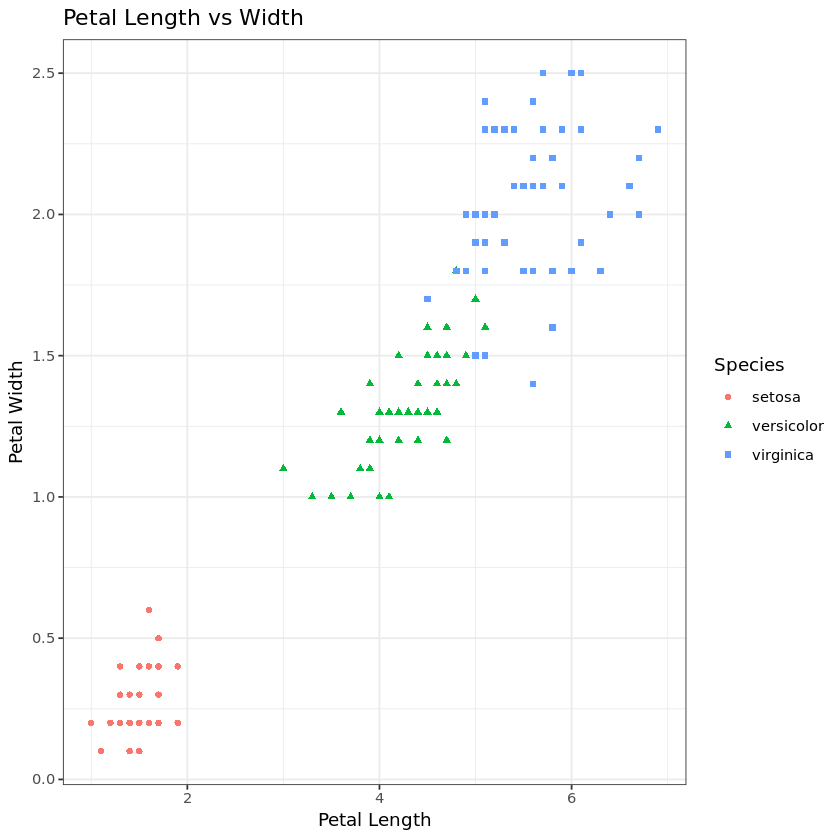

In [28]:
# using different symbol colors for the three species.
ggplot(data = df, aes(x = Petal.Length, y = Petal.Width))+ xlab("Petal Length")+ ylab("Petal Width") +
geom_point(aes(color = Species, shape=Species))+ ggtitle("Petal Length vs Width") + theme_bw()

library(grid)
library(gridExtra)

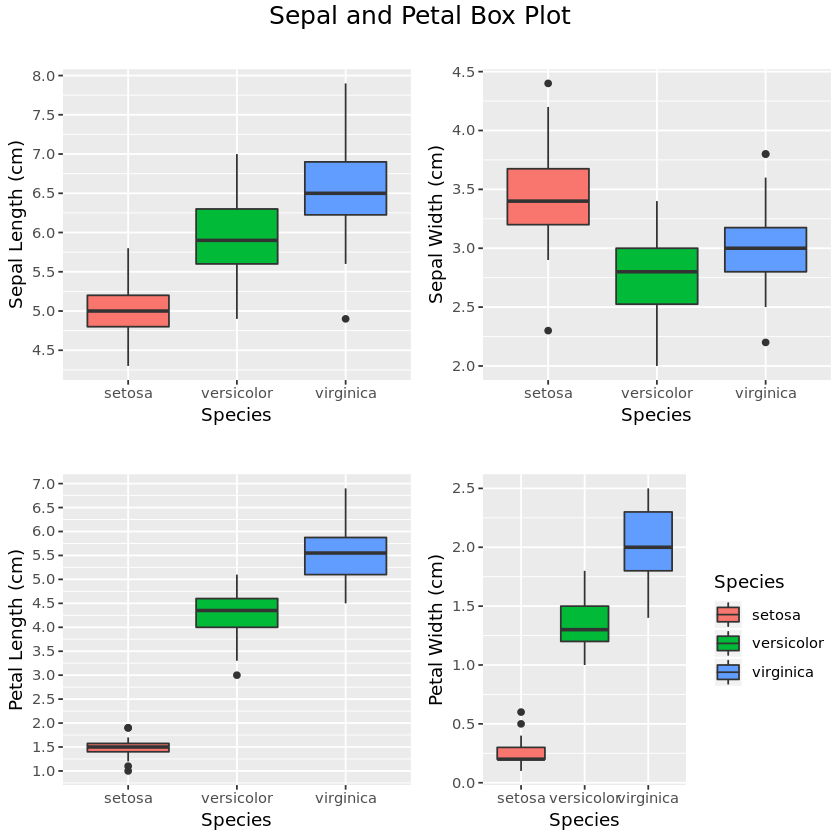

In [35]:
# boxplots


BpSl <- ggplot(df, aes(Species, Sepal.Length, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Sepal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")



BpSw <-  ggplot(df, aes(Species, Sepal.Width, fill=Species)) + 
          geom_boxplot()+
          scale_y_continuous("Sepal Width (cm)", breaks= seq(0,30, by=.5))+
          theme(legend.position="none")

BpPl <- ggplot(df, aes(Species, Petal.Length, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")
        


BpPw <-  ggplot(df, aes(Species, Petal.Width, fill=Species)) + 
        geom_boxplot()+
        scale_y_continuous("Petal Width (cm)", breaks= seq(0,30, by=.5))+
        labs(title = "Iris Box Plot", x = "Species")



# Plot all visualizations
grid.arrange(BpSl  + ggtitle(""),
             BpSw  + ggtitle(""),
             BpPl + ggtitle(""),
             BpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Box Plot", gp=gpar(fontsize=15)))

<b>2.	Write a script file that solves the following system of ODEs. <br>
 
for initial values x=300,y=10 and parameter values: a=0.05, K=500, b=0.0002, g=0.8, e=0.03. <br>
a)	Make three plots, one for x and one for y as a function of time, and one plot expressing y as a function of x (this is called a phase-plane plot). Arrange these plots in 2 rows and 2 columns. <br>
b)	Now run the model with other initial values (x=200, y=50); add the (x,y) trajectories to the phase-plane plot <br>
</b>

In [36]:
install.packages("deSolve")
library(deSolve)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [37]:
# a)
model <- function(time,VAR,pars){
  with(as.list(c(VAR,pars)), {
    dx <- a*x*(1-x/K)-b*x*y
    dy <- g*b*x*y - e*y
    return(list(c(dx,dy)))
  })
}

[[1]]
[1] -2.0  0.1

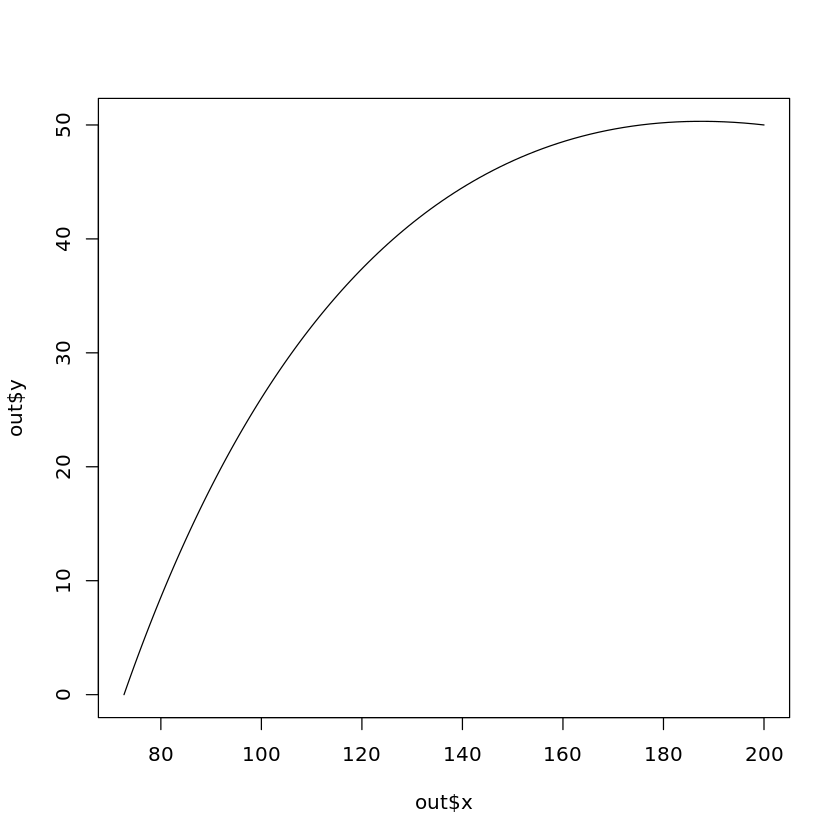

In [38]:
# b)
pars <- c(a=0,b=0.0002,K=500,g=0.8,e=0.03)
VAR <- c(x=200,y=50)
times <- seq(0,1000,1)
model(time,VAR,pars)
out <- as.data.frame(lsoda(VAR,times,model,pars))
plot(out$x,out$y,type="l")